### Buil A Basic Chatbot With Langgraph(GRAPH API)


In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

c:\Users\LENOVO\Desktop\AI_Projects\MCP_krish\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o-mini")

In [6]:
llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x00000187B7F046E0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000187B7F05010>, root_client=<openai.OpenAI object at 0x00000187B77DE270>, root_async_client=<openai.AsyncOpenAI object at 0x00000187B7F04D70>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [7]:
## Node Functionality
def chatbot(state:State)->State:
    return {"messages":[llm.invoke(state["messages"])]}

In [8]:
graph_builder=StateGraph(State)
## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding edges
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile the graph
graph=graph_builder.compile()

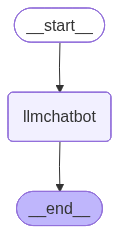

In [9]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [15]:
response=graph.invoke({"messages":"Hello,who is the PM of India?"})


In [17]:
response["messages"][-1].content

'As of my last update, the Prime Minister of India is Narendra Modi. He has been in office since May 2014. Please verify with current sources to ensure this information is still accurate.'